# Context
‣Welcome. This is a Women’s Clothing E-Commerce dataset revolving around the reviews written by customers. Its nine supportive features offer a great environment to parse out the text through its multiple dimensions. Because this is real commercial data, it has been anonymized, and references to the company in the review text and body have been replaced with “retailer”.

‣Content
This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

‣Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.


‣Age: Positive Integer variable of the reviewers age.


‣Title: String variable for the title of the review.


‣Review Text: String variable for the review body.


‣Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.


‣Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.


‣Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.


‣Division Name: Categorical name of the product high level division.
Department Name: Categorical name of the product department name.
Class Name: Categorical name of the product class name.


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from textblob import TextBlob
import warnings

In [35]:
csv = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
csv

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [59]:
df1=csv.drop(['Unnamed: 0'], axis = 1)
df1

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [61]:
df1.sample(5)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
3341,883,54,Love !!,Love this & so cute to have t-shirt with addit...,5,1,0,General,Tops,Knits
6904,251,33,Great cardigan,Just got this yesterday and i'm wearing it tod...,5,1,13,Initmates,Intimate,Lounge
11637,835,44,Totally sublime,Lol on the previous comment about it being a p...,5,1,6,General,Tops,Blouses
21639,1077,66,"Wanted to like it,but it just didn't work.boring!","I ordered this on-line, in a size 8. the fit i...",4,0,0,General,Dresses,Dresses
20876,1078,39,Nice vacation dress,I bought each color in three different sizes b...,4,1,4,General,Dresses,Dresses


In [62]:
df1.duplicated().sum()

21

In [64]:
df1.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [73]:
df1.drop_duplicates(inplace=True)

In [74]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23465 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23465 non-null  int64 
 1   Age                      23465 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22640 non-null  object
 4   Rating                   23465 non-null  int64 
 5   Recommended IND          23465 non-null  int64 
 6   Positive Feedback Count  23465 non-null  int64 
 7   Division Name            23451 non-null  object
 8   Department Name          23451 non-null  object
 9   Class Name               23451 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [75]:
(df1.isna().sum()/df1.shape[0])*100

Clothing ID                 0.000000
Age                         0.000000
Title                      16.147454
Review Text                 3.515875
Rating                      0.000000
Recommended IND             0.000000
Positive Feedback Count     0.000000
Division Name               0.059663
Department Name             0.059663
Class Name                  0.059663
dtype: float64

In [76]:
df1.isna().sum()

Clothing ID                   0
Age                           0
Title                      3789
Review Text                 825
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [77]:
df1.shape

(23465, 10)

In [78]:
df1.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [80]:
df1.dtypes

Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [82]:
df1['Review Text'][1]

'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.'

In [84]:
rev = df1[['Review Text', 'Recommended IND']]
rev.head()

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [87]:
#rename column
rev = rev.rename(columns={"Recommended IND": "Recommended", "Review Text": "Review"})
rev.head()

,Review,Recommended
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [88]:
rev.isnull().sum()

Review         825
Recommended      0
dtype: int64

In [93]:
rev.dropna(subset=['Review'], inplace=True)

In [94]:
rev.isnull().sum()

Review         0
Recommended    0
dtype: int64

In [95]:
rev['Review']= rev['Review'].astype(str)

In [96]:
rev.shape

(22640, 2)

In [97]:
rev['Recommended'].value_counts()

1    18539
0     4101
Name: Recommended, dtype: int64

Text(0.5, 1.0, 'Clothing_rating_chart.png')

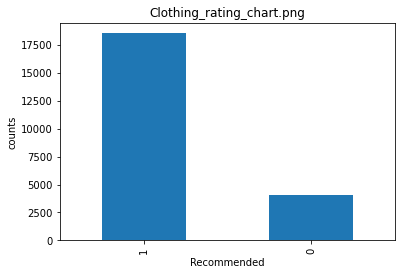

In [100]:
rev['Recommended'].value_counts().plot(kind='bar')
plt.xlabel("Recommended")
plt.ylabel("counts")
plt.title("Clothing_rating_chart.png") # Giving the image a title

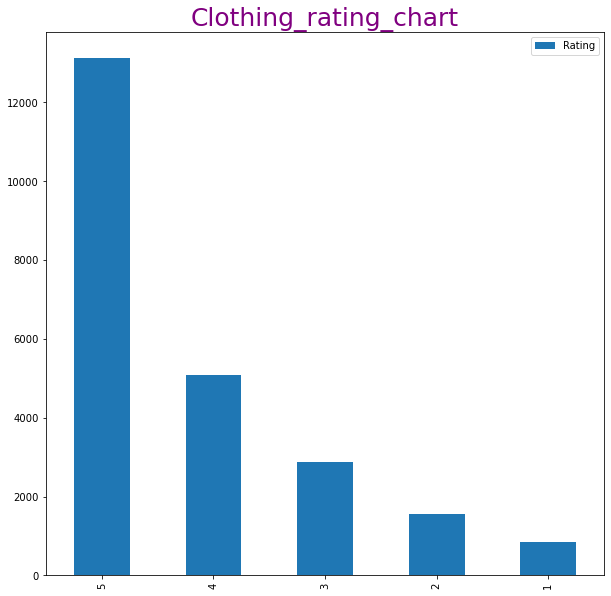

In [160]:
plt.figure(figsize=(10,10))
ax =df1.Rating.value_counts()
ax.plot(kind='bar')
#labels=df1['Rating'].value_counts().index
#plt.pie(ax,labels=labels,autopct='%.2f')
plt.title("Clothing_rating_chart",fontsize=25,color='purple')
plt.legend()
plt.show()


In [134]:
df1 = csv[['Rating']]

In [135]:
#lower case 

In [139]:
Comment.sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

In [140]:
Comment.sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

In [113]:
Comment = TextBlob('i love the length on me')
Comment.sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

In [142]:
def sentiment(text):
    try:
        return TextBlob(text).sentiment
    except:
        return None

In [143]:
#df1['polarity'] = df1['review_text'].apply(sentiment).apply(lambda x:x[0]) # errors running

In [144]:
df1.head()

,Rating
0,4
1,5
2,3
3,5
4,5


In [145]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Rating  23486 non-null  int64
dtypes: int64(1)
memory usage: 183.6 KB


In [146]:
df1.describe()

,Rating
count,23486.000000
mean,4.196032
std,1.110031
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [147]:
df1.isna().sum()

Rating    0
dtype: int64